# The basics of making a sound... 
### (0) Python Zero ! Importing packages, modules, methods
### (1) a sine wave: what does it mean ?  
### (2) time and frequency
### (3) making a sound
### (4) adding and concatenating
### (5) LOOKING at a sound: the Spectrogram
### (6) data: modulating amplitude with an envelope. 

------------------------------------------------- <br>
Python ZERO ! <br>
MODULES are the tools in python. PACKAGES are collections of multiple modules. <br>
FUNCTIONS do things to OBJECTS. There are many kinds of objects, including ones that you can define. <br>
Here's a good tutorial on this basic stuff: <br>
https://realpython.com/python-modules-packages/ <br>
if you want to use a module, you have to import it, which we do in the next code cell: <br>

In [8]:
# this is "commented" text-- it won't do anything- it is just for humans !
# numpy (numerical python) is one we will always use
import numpy as np
# matplotlib is the package for graphics, pyplot is the subpackage for plotting:
from matplotlib import pyplot as plt # for plots
%matplotlib inline 
# this is a statement only for the notebook-- you wouldnt use it in a script-- 
# saying that you want to have the graphics appear in the notebook. 

import IPython.display as ipd
# this is a very handy tool for us-- we'll use its sound player in the notebook. 

outfile_path = '../3_output_nogit/' 
# this is only if you want to save the sounds as files, and this is where you want to save them to. 

(1) a sine wave:  <br>
Way 1: use numpy sin, in radians: a cycle is 2*pi-- this is GEOMETRY, not time ! <br>
time is how fast it sweeps through that geometry ! <br>
remember that the motion of a wave is not the motion of the particle ! <br>

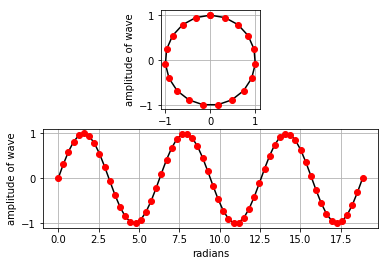

In [61]:
# make a sine wave (in audio, often called an 'oscillator')
sin = np.sin # note that this is a function
pi = np.pi # while this is a floating point object ! 
# pi()

# a circle: 
# 2*pi*1 radian
rads = np.linspace(0,1,20)
circle_x = sin(2*pi*rads)
circle_y = np.cos(2*pi*rads)

plt.subplot(2,1,1)
plt.plot(circle_x,circle_y,'k-') 
plt.plot(circle_x,circle_y,'ro') 
plt.grid()
plt.axis('square')

npts_cycle = 20 # number of points per cycle, or samples per cycle
n_cycles = 3 
x = np.linspace(0,2*pi*n_cycles,npts_cycle*n_cycles)
y = sin(x)

plt.subplot(2,1,2)
plt.plot(x,y,'k-') 
plt.plot(x,y,'ro') 
plt.xlabel('radians')
plt.ylabel('sin(radians)')
plt.grid()

# notice that we did not use frequency here. 
# to convert to a sound, we need to assign time: how fast each cycle takes. 

## (2) time and frequency 

frequency =  440
duration =  2.0
dt =  5.681818181818182e-05
sampling frequency, fs =  17600
35200
35200


(0, 0.006818181818181818)

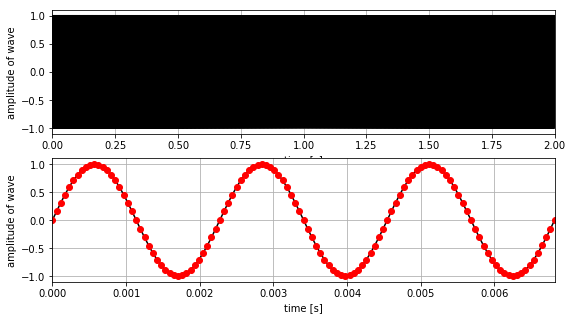

In [16]:
n_cycles = 880 
npts_cycle = 40

# note that this x does not have frequency in it ! 
x = np.linspace(0,2*pi*n_cycles,npts_cycle*n_cycles)
y = np.sin(x)

# frequency: 
f = 440 # Hz (cycles per second)
print('frequency = ', f)
time_per_cycle = period = p = 1/f # [seconds]
duration = n_cycles*period
print('duration = ', duration)

# Here's the trickier bit ! because we started with the idea of "data" not being necessarily in "time"
# we need to define a time interval in terms of the number of points per cycle... 
# or, how time or the data is "discretized" or "sampled": 
dt = 1/f/npts_cycle 
print('dt = ', dt)


# sampling frequency ! not the same as the wave frequency ! 
# must be at least 2x higher f than the highest frequency you want to hear-- called the Nyquist frequency
fs = int(1/dt) # fs must be an integer ! 
print('sampling frequency, fs = ', fs)

# calculate the time vector, just for plotting: 
# using linspace
time = np.linspace(0,period*n_cycles,len(x))
print(len(time))

# OR  using arange
time = np.arange(0,(period*n_cycles),dt)
print(len(time))

# Plot
plt.figure(figsize=(9,5))

plt.subplot(2,1,1)
plt.plot(time,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
plt.xlim(0.0, duration)


plt.subplot(2,1,2)
plt.plot(time,y,'k') 
plt.plot(time,y,'ro') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
# just show a few cycles: 
plt.xlim(0, time_per_cycle*3)


## (3) MAKE A SOUND ! ! 

In [57]:
a_scale = 0.2
ipd.Audio(y*a_scale, rate=fs*2)



number of samples: 22050.0
oscillator frequency:  1000


Text(0,0.5,'amplitude of wave')

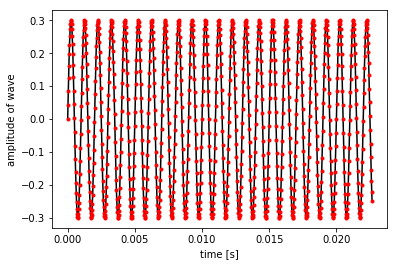

In [55]:
# Another way ! generating oscillators, not "sonifying data"
# so it is simpler, but not representative of what we will be doing. 

# start with the sampling frequency: 
fs2 = 44100 # a standard sound file sampling rate 

dur2 = 0.5 # seconds duration
n_samp2 = dur2*fs2  # seconds*(samples/second)
print('number of samples:',n_samp2)

time2 = np.linspace(0,dur2,n_samp2)

fc2 = 1000 
#fc2 = 8000
#fc2 = 9000
#fc2 = 220*10
#fc2 = fs2/2  # the Nyquist frequency* 
#fc2 = fs2
#fc2 = fs2/3
#fc2 = fs2/(2*pi)
#fc2 = fs2/(2*pi*2)
print('oscillator frequency: ',fc2)

amp2 = 0.3
y2 = amp2 * np.sin(2*pi * fc2 * time2) 

trim = int(n_samp2) # must convert this to an integer! 
trim = 1000 

plt.plot(time2[0:trim],y2[0:trim],'k')  # looking at a part, or a "slice", of the data
plt.plot(time2[0:trim],y2[0:trim],'r.') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')

# https://en.wikipedia.org/wiki/Nyquist_frequency :
# *"When the highest frequency (bandwidth) of a signal is less than the Nyquist frequency of the sampler,
# the resulting discrete-time sequence is said to be free of the distortion known as aliasing, 
# and the corresponding sample-rate is said to be above the Nyquist rate for that particular signal."

In [58]:
# make a sound: 
a_scale = 0.2
ipd.Audio(y2, rate=fs2)


In [56]:
# OR if you want to write the sound to a .wav file: 
from scipy.io.wavfile import write

outfile_name = 'sound_0.wav'
out = outfile_path + outfile_name
ys = y*a_scale # you want all values to be between 1 and -1, but ideally smaller.. 
write(out, fs, ys.astype(np.int16))

## (4) adding and concatenating ! 

sound duration =  2.0
ratio of f2/f1 =  2.0
number of cycles of f1 =  880
number of cycles of f2 =  1760.0
35200


(0, 0.006818181818181818)

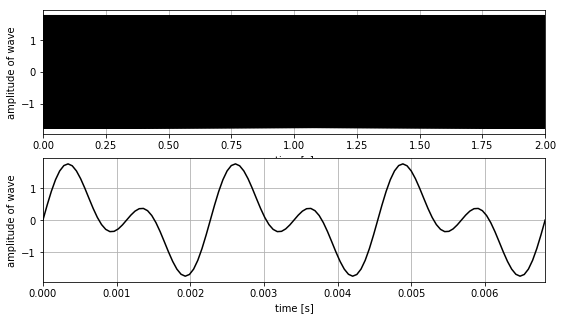

In [65]:
# adding waveforms/signals to make two frequencies
# make vectors of two frequencies, that have the same number of points, long enough to hear

n_cycles = 880
npts_cycle = 40
x1 = np.linspace(0,2*pi*n_cycles,npts_cycle*n_cycles)
y1 = np.sin(x1)

f1 = 440.
p1 = 1/f1
dt = p1/npts_cycle
# duration
dur1 = n_cycles*p1
print('sound duration = ', dur1)

f2 = 2*f1
p2 = 1/f2
n_cycles2 = dur1/p2 

print('ratio of f2/f1 = ', f2/f1)
print('number of cycles of f1 = ', n_cycles)
print('number of cycles of f2 = ', n_cycles2)

# make the same number of points 
x2 = np.linspace(0,2*pi*n_cycles2,len(x1))
y2 = np.sin(x2)

# add them together

y = y1+y2

time1 = np.linspace(0,p1*n_cycles,len(x1))
print(len(time1))

# plot the wave
plt.figure(figsize=(9,5))
plt.subplot(2,1,1)
plt.plot(time1,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
plt.xlim(0, dur1)

plt.subplot(2,1,2)
plt.plot(time1,y,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()
plt.xlim(0, p1*3)


In [66]:
# write the sound: 
#outfile = 'sound_addition.wav'
#out = outfile_path + outfile
fs = int(1/dt) # must be an integer ! 
a_scale = 0.2
#librosa.output.write_wav(out, y*a_scale, fs, norm=False)

ipd.Audio(y*a_scale, rate=fs)

In [67]:
# concatenating
#outfile = 'sound_concat.wav'
#out = outfile_path + outfile

print(y2.shape)
# stick 2 at the end of 1 : 
yc = np.concatenate((y1,y2),axis=0)

fs = int(1/dt) # must be an integer ! 

ipd.Audio(yc*a_scale, rate=fs)

#librosa.output.write_wav(out, yc, fs, norm=False)

(35200,)


## (5) Looking at the sound: The Fourier Transform ! 

### Watch the movie on the human auditory system and tonotopic organization: 


(0, 2933.3333333333335)

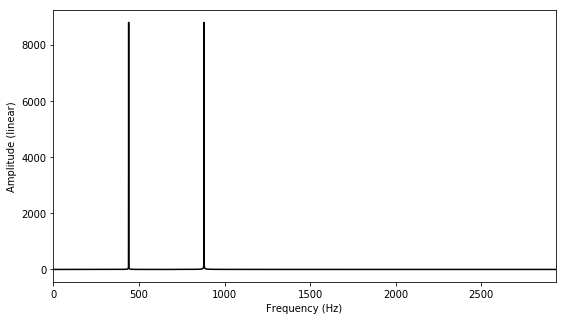

In [68]:
from scipy import fftpack as spfft # for computing spectra
#from scipy import signal as spsig

########## First do the Fourier transform = look at the frequency content of the entire signal
# We do a fast Fourier transform (FFT)

Nfft = int(len(y)/2) #1000 # Number of points (discrete frequencies) on which to compute the FFT 
# (actually twice the number of frequency point we need, but that's another story).
f = np.arange(-Nfft/2,Nfft/2,1)*fs/Nfft 
# the discretized vector of frequencies: contains negative and positive frequencies 
# (see mathematical definition of the Fourier transform)

# FFT computation -> gives the spectrum S
S = spfft.fft(y, n=Nfft)
# S is an array of complex numbers, containing the amplitude for each frequency bin in f, but in another order... 
# First positive frequency bins, then negative frequency bins...

# Let's consider only positive frequencies
f = f[int(len(f)/2):] 
S = S[:int(len(S)/2)] 
# Now f covers the (discretized) frequency range from 0 to sr/2 Hz (see Nyquist theorem, Nyquist frequency)

########## Finally plot the spectrum
plt.figure(figsize=(9,5))
plt.plot(f,np.absolute(S),'k') # Since S is complex-valued, we have to choose between the absolute value and phase
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (linear)')
plt.xlim([0,fs/6])

# plt.figure(figsize=(9,5))
# plt.plot(f,20*np.log10(np.absolute(S)),'k') # Take the log10 with numpy, 
# # and have a factor 20 because we're dealing with acoustic pressure (L = 20log10(p/pref)) and not intensity (L = 10log10(p/pref))
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude (dB)')
# plt.xlim([0,fs/6])

## (5) Looking at the sound: The Spectrogram ! 

The "problem" with FFT is that it averages the frequency content over the whole signal. We completely lose the 
information of time.

so... Short Term Fourier Transform (STFT).

The idea is to cut the signal into successive time frames and perform an FFT for each frame. 
Involves quite a bit of mathematical stuff which we will ingeniously skip here...

See here for a graphical explanation https://www.researchgate.net/figure/231828310_fig7_Figure-7-Short-time-Fourier-transform-STFT-with-envelope-and-two-sample-overlap

And the well-known "spectrogram" is only a graphical representation of the STFT. 

sampling frequency fs = 17600
number of samples = 35200
sound duration = 2.0
window duration in seconds: 0.02
window length in samples: 352
704
(353, 199)


Text(0,0.5,'dB')

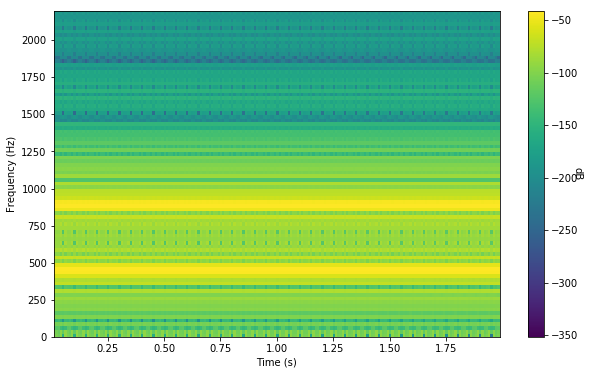

In [69]:
from scipy import signal as spsig

# SPECTROGRAM !
# Computes the short time fourier transform STFT for a chosen number of windows in time on your signal
# "Uncertainty Principle": there is a direct tradeoff between resolution in frequency and in time: 
# that is governed by the window length NfftSTFT

# for the full signal spectra, the Nfft (number of frequencies was simply the length of the signal. 
# instead calculate Nfft upward from the sampling frequency and then window time? 
# 
data = y
print('sampling frequency fs = ' + str(fs))
print('number of samples = ' + str(len(data)))
duration = len(data)/fs
print('sound duration = ' + str(duration))


numwindows = 100  # PLAY WITH THIS ! 
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# maybe want to find the nearest power of 2 for the window length, to get rid of all the ringing?

NfftSTFT = WindowLength*2 #you cannot sample any frequency (in points) that is higher than the 1/number of points in the window, 
# and LOWER than HALF the window length

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)
# This changes the total number of windows, but has to be smaller than the window length (in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)
#print(fSTFT.shape)
#print(tSTFT.shape)


# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

## (6) modulate the amplitude with an envelope ! 

(35200,)
5866
(5866,)
(29334,)


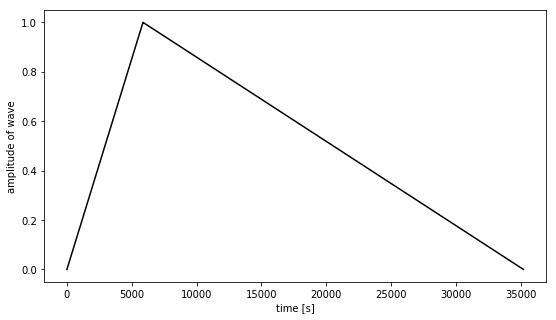

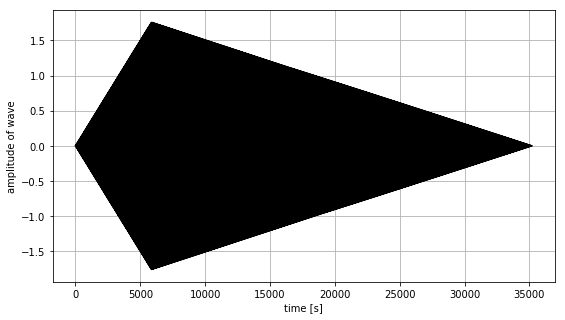

In [70]:
# 1) make a curve that will be the envelope, of the same length as the original signal
N = len(y)
envelope = np.zeros(N)
print(envelope.shape)
peak = int(N/6)
print(peak)

# from 0 to the peak index (peak):
up = np.linspace(0,1,peak)
print(up.shape)
envelope[:peak] = up

# and fill in the rest: 
down = np.linspace(1,0,(N-peak))
print(down.shape)
envelope[peak:] = down

# plot the envelope
plt.figure(figsize=(9,5))
plt.plot(envelope,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')

# modulate the signal by multiplication
ym = y*envelope

# plot the wave
plt.figure(figsize=(9,5))
plt.plot(ym,'k') 
plt.xlabel('time [s]')
plt.ylabel('amplitude of wave')
plt.grid()

# make the sound
#outfile = 'sound_env.wav'
#out = outfile_path + outfile
fs = int(1/dt) # must be an integer ! 
a_scale = 0.9
#librosa.output.write_wav(outfile, ym*a_scale, fs, norm=False)

ipd.Audio(ym*a_scale, rate=fs)

## (7) PLOT THE SPECTROGRAM OF THE envelope modulated signal

sampling frequency fs = 17600
number of samples = 35200
sound duration = 2.0
window duration in seconds: 0.05
window length in samples: 880
1760
(881, 79)


Text(0,0.5,'dB')

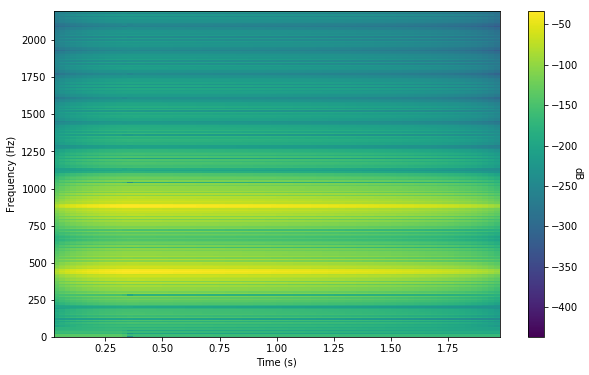

In [71]:
from scipy import signal as spsig

data = ym
print('sampling frequency fs = ' + str(fs))
print('number of samples = ' + str(len(data)))
duration = len(data)/fs
print('sound duration = ' + str(duration))
numwindows = 40 # now we need better time resolution ! 
WindowDur = duration/numwindows


WindowLength = int(WindowDur*fs) # [s] The length of each frame (should be expressed in samples)
# does this need to be a power of 2 ?  apparently not ! 
NfftSTFT = WindowLength*2 # you want the Nyquist frequency to be the window length ! (in number of samples, not seconds)

print('window duration in seconds: ' +str(WindowDur))
print('window length in samples: ' +str(WindowLength))
print(NfftSTFT)

Overlap = int(WindowLength/2) # The overlapping between successive frames (should be expressed in samples)
# This changes the total number of windows, but has to be smaller than the window length (in samples)

[fSTFT, tSTFT, STFT] = spsig.spectrogram(data, fs, nperseg=WindowLength, noverlap=Overlap, nfft=NfftSTFT) 
# also provides associated f and t vectors!
print(STFT.shape)

# Let's plot the spectrogram
plt.figure(figsize=(10,6))
plt.pcolormesh(tSTFT,fSTFT,20*np.log10(np.absolute(STFT)))
plt.ylim([0,fs/8])
#plt.xlim([0,dur1-SliceLength/sr])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar = plt.colorbar()
cbar.ax.set_ylabel('dB', rotation=270)

## Play around: 
### Generate a signal that grows in a loop. Each passage through the loop will modify some parameter. 
### For example: make some beeps with different frequency ratios  (build added oscillators, then multiply them by envelopes, then concatenate those...), or add and then concatenate... 

In [84]:
#freq_rats = np.asarray([1,4/3,3/2,6/5,2.0]) # 5/4 = major third, 6/5 = minor third
freq_rats = np.asarray([1,6/5,3/2,4/3,2.0]) # 5/4 = major third, 6/5 = minor third, 4/3 = perfect fourth
root0 = 220
list_freqs = [root0, 3/2*root0, 3/2*(3/2*root0), 3/2*root0, root0]
#list_freqs = [root0, 3/2*root0, 3/2*(3/2*root0), 3/2*root0, root0]
root_freqs = np.asarray(list_freqs)

220.0
330.0
495.0
330.0
220.0
330750


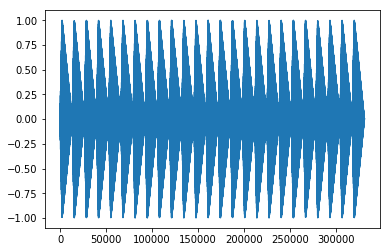

In [85]:
# signal length (same for each note)
dur0 = 0.6  # sec
fs = 22050  # samples/sec
npts = int(dur0*fs)
song = np.asarray([])

# envelope: 
N = npts
envelope = np.zeros(N)
peak = int(N/6)
up = np.linspace(0,1,peak)
envelope[:peak] = up
down = np.linspace(1,0,(N-peak))
envelope[peak:] = down

for iff,root in enumerate(root_freqs):
    print(root)
    for i,freq_rat in enumerate(freq_rats):
        #print(freq)
        freq = root*freq_rat
        n_cycles = dur0*freq
        x = np.linspace(0,2*pi*n_cycles,npts)
        y = np.sin(x) 
        y = y*envelope
        song = np.concatenate((song,y))
        
print(len(song))

plt.plot(song)

In [86]:
ipd.Audio(song*a_scale, rate=fs) 